<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [56]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import VGG16

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [5]:
y_train = y_train.reshape(-1,) # converting y_train to 1D array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

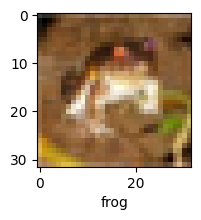

In [9]:
plot_sample(X_train, y_train, 0)

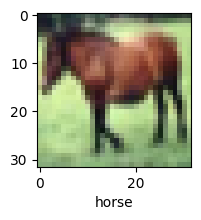

In [11]:
plot_sample(X_train, y_train, 7)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [45]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # Input layer
        layers.Dense(3000, activation='relu'), # hidden layer 1
        layers.Dense(1000, activation='relu'), # hidden layer 2
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD', # SGD for large datasets
              loss='sparse_categorical_crossentropy', # Softmax because the values are not 1-hot encoded and are rather integers
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8086 - accuracy: 0.3565
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6211 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5390 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4786 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4331 - accuracy: 0.4969


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [15]:
# For ANN
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("ANN Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      1000
           1       0.70      0.45      0.54      1000
           2       0.31      0.51      0.38      1000
           3       0.45      0.15      0.22      1000
           4       0.40      0.36      0.38      1000
           5       0.44      0.35      0.39      1000
           6       0.46      0.60      0.52      1000
           7       0.43      0.64      0.51      1000
           8       0.78      0.41      0.54      1000
           9       0.47      0.68      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [16]:
cnn = models.Sequential([
    # Adding non-linearity wirh ReLU in convolution layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Adding non-linearity wirh ReLU in convolution layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [18]:
# Compile the CNN model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Using sparse categorical for predicting one of many classes
              metrics=['accuracy'])

In [55]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3108 - accuracy: 0.1013
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3033 - accuracy: 0.0996
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3032 - accuracy: 0.1013
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3015 - accuracy: 0.1046
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0542 - accuracy: 0.2550
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8490 - accuracy: 0.3393
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6641 - accuracy: 0.4033
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5630 - accuracy: 0.4381
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5022 - accuracy: 0.4616
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9689 - accuracy: 0.6887


[0.9689323306083679, 0.6887000203132629]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.36742392e-03, 1.28137748e-04, 4.78177826e-04, 9.49843645e-01,
        2.03026342e-04, 3.47196311e-02, 1.00199943e-02, 1.27791345e-05,
        3.07737151e-03, 1.49747211e-04],
       [5.44176735e-02, 4.03877487e-03, 3.58457728e-05, 2.27227673e-07,
        5.63526070e-09, 2.02040917e-09, 8.17515222e-11, 9.47894492e-08,
        9.41386342e-01, 1.21082565e-04],
       [4.63445932e-02, 6.66416764e-01, 3.28545715e-03, 4.76340821e-04,
        1.30456721e-03, 1.49399566e-05, 1.22754054e-05, 2.21741316e-03,
        8.20793137e-02, 1.97848275e-01],
       [9.89824593e-01, 2.99882464e-04, 5.56254061e-03, 4.56176786e-04,
        1.04118907e-03, 2.32228967e-06, 1.41572855e-06, 2.46385730e-06,
        2.76135886e-03, 4.80144226e-05],
       [4.25761209e-06, 1.61103471e-05, 9.64783654e-02, 1.22091755e-01,
        1.21367700e-01, 4.86853393e-03, 6.55160964e-01, 6.80211087e-07,
        1.12829966e-05, 3.18315756e-07]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

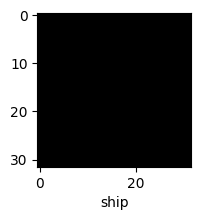

In [53]:
plot_sample(X_test, y_test,2) # Actual value

In [54]:
classes[y_classes[2]] # Predicted value

'automobile'

In [47]:
classes[y_classes[3]]

'airplane'

## CNN Classification report

In [52]:
print("classification report: \n", classification_report(y_test, y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.70      0.77      0.74      1000
           1       0.89      0.74      0.81      1000
           2       0.58      0.60      0.59      1000
           3       0.45      0.63      0.52      1000
           4       0.65      0.62      0.64      1000
           5       0.58      0.56      0.57      1000
           6       0.83      0.70      0.76      1000
           7       0.84      0.64      0.73      1000
           8       0.76      0.83      0.79      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



Less computation for CNN as compared to ANN because max pooliong layer is being used which reduces dimensions

In [80]:
# Load the pre-trained VGG16 model without including the top (fully connected) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the weights of the pre-trained layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create a Sequential model
cnn_vgg = models.Sequential([
    # Pre-trained convolutional base
    vgg_base,
    
    # Flatten layer to convert 3D feature maps to 1D feature vectors
    layers.Flatten(),
    
    # Dense layer with ReLU activation
    layers.Dense(64, activation='relu'),

    # Dense layer with ReLU activation
    layers.Dense(64, activation='relu'),
    
    # Output layer with softmax activation for multi-class classification
    layers.Dense(10, activation='softmax')
])

# Print model summary
# cnn_vgg.summary()

In [81]:
# Compile the model with specified optimizer, loss function, and metrics
cnn_vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Using sparse categorical cross-entropy
              metrics=['accuracy'])

# cnn_vgg.summary()

In [82]:
cnn_vgg.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 189s 121ms/step - loss: 2.3052 - accuracy: 0.0983
Epoch 2/5
1563/1563 [==============================] - 149s 96ms/step - loss: 2.3028 - accuracy: 0.0998
Epoch 3/5
1563/1563 [==============================] - 751s 481ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 4/5
1563/1563 [==============================] - 782s 500ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 5/5
1563/1563 [==============================] - 119s 76ms/step - loss: 2.3028 - accuracy: 0.0975


In [83]:
y_pred_2 = cnn_vgg.predict(X_test)
y_pred_2[:5]

313/313 [==============================] - 21s 65ms/step


array([[0.10036824, 0.10092563, 0.10237101, 0.09877689, 0.09986979,
        0.10045166, 0.09806694, 0.09868503, 0.09906852, 0.10141622],
       [0.10036824, 0.10092563, 0.10237101, 0.09877689, 0.09986979,
        0.10045166, 0.09806694, 0.09868503, 0.09906852, 0.10141622],
       [0.10036824, 0.10092563, 0.10237101, 0.09877689, 0.09986979,
        0.10045166, 0.09806694, 0.09868503, 0.09906852, 0.10141622],
       [0.10036824, 0.10092563, 0.10237101, 0.09877689, 0.09986979,
        0.10045166, 0.09806694, 0.09868503, 0.09906852, 0.10141622],
       [0.10036824, 0.10092563, 0.10237101, 0.09877689, 0.09986979,
        0.10045166, 0.09806694, 0.09868503, 0.09906852, 0.10141622]],
      dtype=float32)

In [84]:
y_classes_2 = [np.argmax(element) for element in y_pred_2]
y_classes_2[:5]

[2, 2, 2, 2, 2]

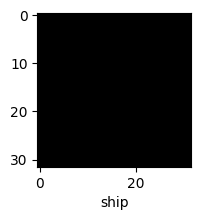

In [85]:
plot_sample(X_test, y_test,2) # Actual value

In [89]:
classes[y_classes_2[2]] # Predicted value

'bird'

<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)